[Introduction to GPT-4o Blog](https://cookbook.openai.com/examples/gpt4o/introduction_to_gpt4o)

In [3]:
! pip install openai ipython

In [8]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are fortune teller. All you need is someone's name"},
        {"role": "user", "content": "Hello my name is Harshavardhan Reddy Lingampally"}
    ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Hello, Harshavardhan Reddy Lingampally. I see a bright path ahead for you. Your name carries significant strength and resilience. In the near future, I sense opportunities for growth and advancement in your career. You have a unique ability to connect with others, and this will open new doors for collaboration and success. Embrace the challenges that come your way, as they will lead to meaningful personal and professional development. Trust your instincts, and remember that perseverance will be your greatest ally. Keep an open mind and heart, and great things will unfold for you.', role='assistant', function_call=None, tool_calls=None)


# Assistants API with GPT-4o

In [1]:
# create assistant
from openai import OpenAI
client = OpenAI()

my_assistant = client.beta.assistants.create(
    instructions="You are a personal math tutor. Write and run the python the code to solve the problem.",
    name="Math Tutor",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4o"
)
print(my_assistant)

Assistant(id='asst_29AaGvR9BDajKblaGAli3yJ8', created_at=1715778118, description=None, instructions='You are a personal math tutor. Write and run the python the code to solve the problem.', metadata={}, model='gpt-4o', name='Math Tutor', object='assistant', tools=[CodeInterpreterTool(type='code_interpreter')], response_format='auto', temperature=1.0, tool_resources=ToolResources(code_interpreter=ToolResourcesCodeInterpreter(file_ids=[]), file_search=None), top_p=1.0)


In [9]:
from openai import OpenAI
client = OpenAI()

In [ ]:
empty_thread = client.beta.threads.create()
print(empty_thread)

In [5]:
thread_message = client.beta.threads.messages.create(
    "thread_gKQllnjt07jEcnYytXGtl4Zv",
    role="user",
    content="What is X if 2X + 3 = 7? Show me your work"
)

In [6]:
## Non Streaming
run = client.beta.threads.runs.create(
    thread_id="thread_gKQllnjt07jEcnYytXGtl4Zv",
    assistant_id="asst_29AaGvR9BDajKblaGAli3yJ8"
)
print(run)

Run(id='run_9CuDjbC1bK3yqkzwIKNBN4jC', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=None, created_at=1715778355, expires_at=1715778955, failed_at=None, incomplete_details=None, instructions='You are a personal math tutor. Write and run the python the code to solve the problem.', last_error=None, max_completion_tokens=None, max_prompt_tokens=None, metadata={}, model='gpt-4o', object='thread.run', required_action=None, response_format='auto', started_at=None, status='queued', thread_id='thread_gKQllnjt07jEcnYytXGtl4Zv', tool_choice='auto', tools=[CodeInterpreterTool(type='code_interpreter')], truncation_strategy=TruncationStrategy(type='auto', last_messages=None), usage=None, temperature=1.0, top_p=1.0, tool_resources={})


In [8]:
ret_run = client.beta.threads.runs.retrieve(
    thread_id="thread_gKQllnjt07jEcnYytXGtl4Zv",
    run_id="run_9CuDjbC1bK3yqkzwIKNBN4jC"
)
print(ret_run)

Run(id='run_9CuDjbC1bK3yqkzwIKNBN4jC', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=1715778358, created_at=1715778355, expires_at=None, failed_at=None, incomplete_details=None, instructions='You are a personal math tutor. Write and run the python the code to solve the problem.', last_error=None, max_completion_tokens=None, max_prompt_tokens=None, metadata={}, model='gpt-4o', object='thread.run', required_action=None, response_format='auto', started_at=1715778355, status='completed', thread_id='thread_gKQllnjt07jEcnYytXGtl4Zv', tool_choice='auto', tools=[CodeInterpreterTool(type='code_interpreter')], truncation_strategy=TruncationStrategy(type='auto', last_messages=None), usage=Usage(completion_tokens=45, prompt_tokens=328, total_tokens=373), temperature=1.0, top_p=1.0, tool_resources={})


In [9]:
ret_steps = client.beta.threads.runs.steps.list(
    thread_id="thread_gKQllnjt07jEcnYytXGtl4Zv",
    run_id="run_9CuDjbC1bK3yqkzwIKNBN4jC"
)
print(ret_steps)

SyncCursorPage[RunStep](data=[RunStep(id='step_PmeykOMuvhFqhBdxUMZoZTpl', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=1715778358, created_at=1715778358, expired_at=None, failed_at=None, last_error=None, metadata=None, object='thread.run.step', run_id='run_9CuDjbC1bK3yqkzwIKNBN4jC', status='completed', step_details=MessageCreationStepDetails(message_creation=MessageCreation(message_id='msg_IDWXfNGIgdhP0IOBR8ROi381'), type='message_creation'), thread_id='thread_gKQllnjt07jEcnYytXGtl4Zv', type='message_creation', usage=Usage(completion_tokens=14, prompt_tokens=185, total_tokens=199), expires_at=None), RunStep(id='step_hOGQxPD9CJIw5pzFpcPmbCwp', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=1715778358, created_at=1715778356, expired_at=None, failed_at=None, last_error=None, metadata=None, object='thread.run.step', run_id='run_9CuDjbC1bK3yqkzwIKNBN4jC', status='completed', step_details=ToolCallsStepDetails(tool_calls=[CodeInt

In [12]:
## Streaming
stream = client.beta.threads.runs.create(
    thread_id="thread_gKQllnjt07jEcnYytXGtl4Zv",
    assistant_id="asst_29AaGvR9BDajKblaGAli3yJ8",
    stream=True
)

for event in stream:
    print(event)

ThreadRunCreated(data=Run(id='run_K4QEY0WvCcZtOJtNYvASacHN', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=None, created_at=1715778911, expires_at=1715779511, failed_at=None, incomplete_details=None, instructions='You are a personal math tutor. Write and run the python the code to solve the problem.', last_error=None, max_completion_tokens=None, max_prompt_tokens=None, metadata={}, model='gpt-4o', object='thread.run', required_action=None, response_format='auto', started_at=None, status='queued', thread_id='thread_gKQllnjt07jEcnYytXGtl4Zv', tool_choice='auto', tools=[CodeInterpreterTool(type='code_interpreter')], truncation_strategy=TruncationStrategy(type='auto', last_messages=None), usage=None, temperature=1.0, top_p=1.0, tool_resources={'code_interpreter': {'file_ids': []}}), event='thread.run.created')
ThreadRunQueued(data=Run(id='run_K4QEY0WvCcZtOJtNYvASacHN', assistant_id='asst_29AaGvR9BDajKblaGAli3yJ8', cancelled_at=None, completed_at=None, create

## Test GPT-4o Base64 Image Processing

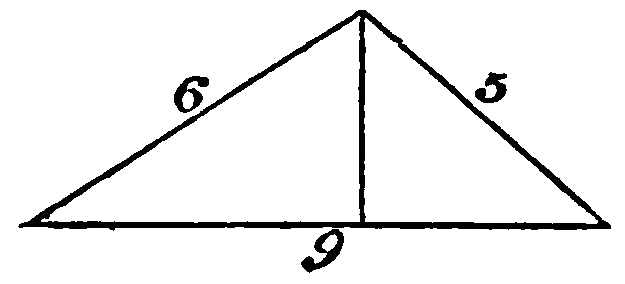

In [6]:
# view the image
from IPython.display import Image, display, Audio, Markdown

IMAGE_PATH = "data/triangle.png"

display(Image(IMAGE_PATH))

In [9]:
import base64

# encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
base64_image = encode_image(IMAGE_PATH)

# analyze the image
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a helpful assistant that responds in Markdown. Help me with my math homework!"},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the triangle?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/png;base64,{base64_image}"
            }}
        ]},
    ],
    temperature=0.0,
)

print(response.choices[0].message.content)


To find the area of the triangle, we can use Heron's formula. First, we need to find the semi-perimeter \( s \) of the triangle.

The semi-perimeter \( s \) is given by:
\[ s = \frac{a + b + c}{2} \]

where \( a \), \( b \), and \( c \) are the lengths of the sides of the triangle. In this case, \( a = 6 \), \( b = 5 \), and \( c = 9 \).

So,
\[ s = \frac{6 + 5 + 9}{2} = \frac{20}{2} = 10 \]

Next, we use Heron's formula to find the area \( A \):
\[ A = \sqrt{s(s-a)(s-b)(s-c)} \]

Substituting the values we have:
\[ A = \sqrt{10(10-6)(10-5)(10-9)} \]
\[ A = \sqrt{10 \cdot 4 \cdot 5 \cdot 1} \]
\[ A = \sqrt{200} \]
\[ A = 10\sqrt{2} \]

So, the area of the triangle is \( 10\sqrt{2} \) square units.


# GPT-4o Video Processing

In [10]:
! pip install opencv-python --quiet
! pip install moviepy --quiet

In [1]:
# Process the video into two components: frames and audio
import cv2
from moviepy.editor import VideoFileClip
import time
import base64
import os

VIDEO_PATH = "data/keynote_recap.mp4"

In [3]:
def process_video(video_path, seconds_per_frame=2):
    base64Frames = []
    base_video_path, _ = os.path.splitext(video_path)

    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_to_skip = int(fps * seconds_per_frame)
    curr_frame = 0

    # Loop through the video and extract frames at specified sampling rate
    while curr_frame < total_frames - 1:
        video.set(cv2.CAP_PROP_POS_FRAMES, curr_frame)
        success, frame = video.read()
        if not success:
            break
        _, buffer = cv2.imencode(".jpg", frame)
        base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
        curr_frame += frame_to_skip
    video.release()

    # Extract audio from video
    audio_path = f"{base_video_path}.mp3"
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_path, bitrate="32k")
    clip.audio.close()
    clip.close()

    print(f"Extracted {len(base64Frames)} frames and audio from video")
    print(f"Extracted audio to {audio_path}")
    return base64Frames, audio_path

In [4]:
base64Frames, audio_path = process_video(VIDEO_PATH, seconds_per_frame=1)

MoviePy - Writing audio in data/keynote_recap.mp3


MoviePy - Done.
Extracted 218 frames and audio from video
Extracted audio to data/keynote_recap.mp3


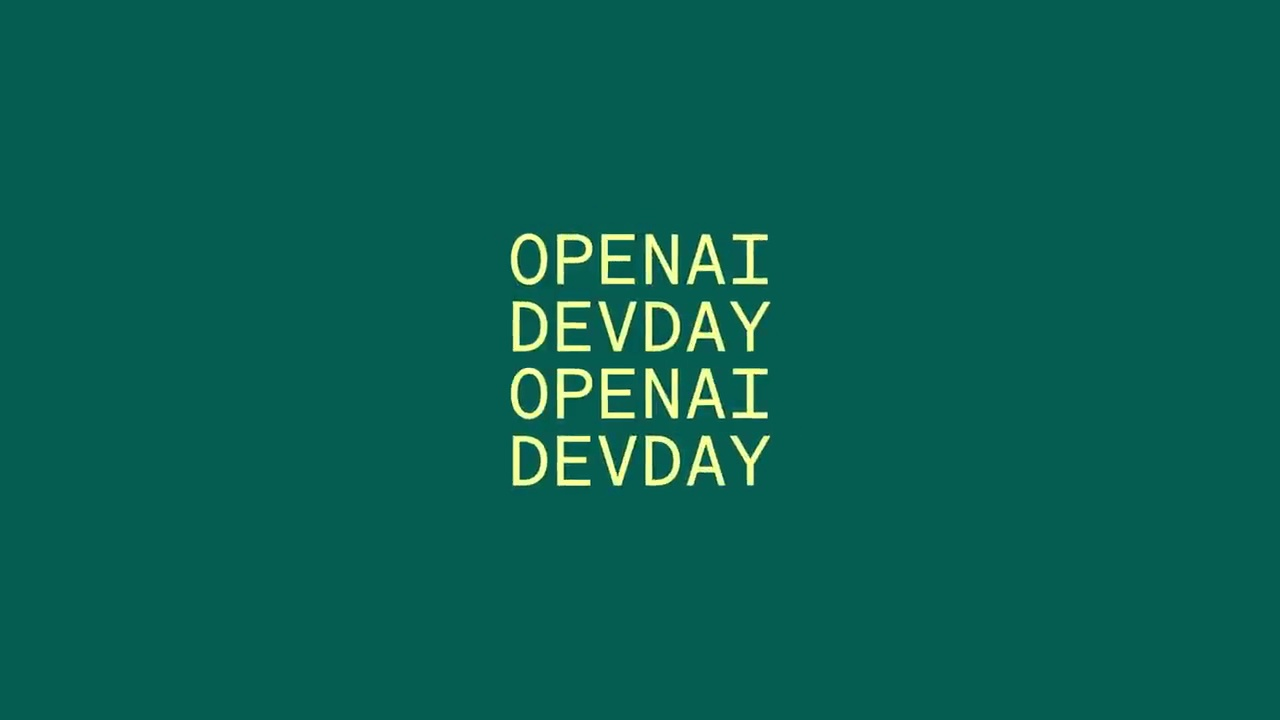

In [7]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(1)

Audio(audio_path)

## Visual Summary

In [10]:
MODEL="gpt-4o"
response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are generating a video summary. Please provide a summary of the video. Respond in Markdown."},
        {"role": "user", "content": [
            "These are the frames from the video.",
            *map(lambda x: {"type": "image_url",
                            "image_url": {"url": f"data:image/jpg;base64,{x}", "detail": "low"}}, base64Frames)
        ]}
    ],
    temperature=0,
)
print(response.choices[0].message.content)

## Video Summary

The video appears to be a keynote presentation from OpenAI's DevDay event. Here are the key points covered in the video:

1. **Introduction**:
   - The video starts with the title "OpenAI DevDay" and transitions to "Keynote Recap."

2. **Event Venue**:
   - The venue is shown with a banner displaying "OpenAI DevDay."
   - The event seems well-attended with a large audience.

3. **Keynote Presentation**:
   - A speaker, who is not identified, takes the stage to present.
   - The presentation covers several key topics and announcements.

4. **Announcements**:
   - **GPT-4**: Introduction of GPT-4 and its enhanced version, GPT-4 Turbo.
   - **JSON Mode**: A feature that allows structured data output.
   - **Function Calling**: Demonstration of improved function calling capabilities.
   - **DALL-E 3**: Introduction of the new version of the DALL-E model.
   - **Custom Models**: Announcement of custom models for specific use cases.
   - **Token Efficiency**: Improvements i

## Audio Summary

In [11]:
#Transcribe the audio
transcription = client.audio.transcriptions.create(
    model="whisper-1",
    file=open(audio_path, "rb"),
)
print("Transcript: ", transcription.text + "\n\n")

response = client.chat.completions.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": """You are generating a transcript summary. Create a summary of the provided transcription. Respond in Markdown."""},
        {"role": "user", "content": [
            {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ]}
    ],
    temperature=0,
)
print(response.choices[0].message.content)

Transcript:  Welcome to our first-ever OpenAI Dev Day. Today, we are launching a new model, GPT-4 Turbo. GPT-4 Turbo supports up to 128,000 tokens of context. We have a new feature called JSON mode, which ensures that the model will respond with valid JSON. You can now call many functions at once, and it'll do better at following instructions in general. You want these models to be able to access better knowledge about the world. So do we. So we're launching retrieval in the platform. You can bring knowledge from outside documents or databases into whatever you're building. GPT-4 Turbo has knowledge about the world up to April of 2023, and we will continue to improve that over time. Dolly 3, GPT-4 Turbo with Vision, and the new Text-to-Speech model are all going into the API today. Today, we're launching a new program called Custom Models. With Custom Models, our researchers will work closely with the company to help them make a great custom model, especially for them and their use cas

## Audio + Visual Summary

In [12]:
## Generate a summary with visual and audio
response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""You are generating a video summary. Create a summary of the provided video and its transcript. Respond in Markdown"""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        {"type": "text", "text": f"The audio transcription is: {transcription.text}"}
        ],
    }
],
    temperature=0,
)
print(response.choices[0].message.content)

## Video Summary: OpenAI Dev Day Keynote

### Introduction
- **Event**: OpenAI Dev Day
- **Key Announcement**: Launch of GPT-4 Turbo

### Key Features and Announcements
1. **GPT-4 Turbo**:
   - Supports up to 128,000 tokens of context.
   - New JSON mode ensures responses in valid JSON format.
   - Improved function calling and instruction following.

2. **Knowledge and Retrieval**:
   - GPT-4 Turbo has knowledge up to April 2023.
   - Launch of retrieval feature to bring external knowledge from documents or databases into applications.

3. **API Enhancements**:
   - Introduction of DALL-E 3, GPT-4 Turbo with Vision, and a new Text-to-Speech model.
   - Launch of Custom Models program for tailored AI solutions.
   - Higher rate limits: Doubling tokens per minute for established GPT-4 customers.
   - GPT-4 Turbo is significantly cheaper: 3x less for prompt tokens and 2x less for completion tokens.

4. **GPTs (Custom Chatbots)**:
   - Tailored versions of ChatGPT for specific purposes.
 

## Example 2: Question and Answering

For the Q&A, we'll use the same concept as before to ask questions of our processed video while running the same 3 tests to demonstrate the benefit of combining input modalities:

## Visual Q&A

In [13]:
QUESTION = "Question: Why did Sam Altman have an example about raising windows and turning the radio on?"

qa_visual_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content": "Use the video to answer the provided question. Respond in Markdown."},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Visual QA:\n" + qa_visual_response.choices[0].message.content)

Visual QA:
Sam Altman used the example about raising windows and turning the radio on to demonstrate the new function calling capabilities of GPT-4 Turbo. The example illustrated how the model can now handle more complex tasks by breaking down a single command into multiple actions, such as raising the windows and turning the radio on, and executing them through function calls. This showcases the enhanced control and functionality of the updated model.



## Audio Q&A

In [14]:
qa_audio_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the transcription to answer the provided question. Respond in Markdown."""},
    {"role": "user", "content": f"The audio transcription is: {transcription.text}. \n\n {QUESTION}"},
    ],
    temperature=0,
)
print("Audio QA:\n" + qa_audio_response.choices[0].message.content)

Audio QA:
The provided transcription does not mention Sam Altman or any example about raising windows and turning the radio on. Therefore, I cannot provide an answer based on the given information.


## Visual + Audio Q&A

In [15]:
qa_both_response = client.chat.completions.create(
    model=MODEL,
    messages=[
    {"role": "system", "content":"""Use the video and transcription to answer the provided question."""},
    {"role": "user", "content": [
        "These are the frames from the video.",
        *map(lambda x: {"type": "image_url", 
                        "image_url": {"url": f'data:image/jpg;base64,{x}', "detail": "low"}}, base64Frames),
                        {"type": "text", "text": f"The audio transcription is: {transcription.text}"},
        QUESTION
        ],
    }
    ],
    temperature=0,
)
print("Both QA:\n" + qa_both_response.choices[0].message.content)

Both QA:
Sam Altman used the example about raising windows and turning the radio on to demonstrate the improved function calling capabilities of GPT-4 Turbo. The example illustrated how the model can now handle multiple function calls more effectively and follow instructions better. This was shown by comparing the "before" and "after" scenarios, where the model's ability to execute multiple commands in a single prompt was highlighted.


## Test GPT-4o Speech recognition